In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data/cleaned_food_waste_data.csv')

df

,Country,Year,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
0,Australia,2019,Fruits & Vegetables,19268.63,18686.68,110.025,87.59,53.64
1,Indonesia,2019,Prepared Food,3916.97,4394.48,192.520,1153.99,30.61
2,France,2023,Fruits & Vegetables,46299.69,40551.22,120.190,953.05,31.91
3,France,2023,Beverages,33096.57,36980.82,104.740,1105.47,36.06
4,India,2024,Fruits & Vegetables,11962.89,11196.04,136.210,1311.91,37.09
...,...,...,...,...,...,...,...,...
4875,France,2021,Beverages,47524.74,48058.40,77.410,1087.46,39.73
4876,Australia,2021,Beverages,32337.72,32705.08,194.350,1336.32,64.83
4877,China,2018,Meat & Seafood,20640.96,22485.33,21.040,16.13,31.23
4878,Australia,2021,Beverages,26566.64,29357.57,197.140,1086.17,69.95


In [29]:
# 📌 Вычисляем базовые статистические характеристики по числовым признакам
df.describe().T[['count', 'mean', 'std', 'min', '50%', 'max']]
# df.select_dtypes('number').describe().T[['count', 'mean', 'std', 'min', '50%', 'max']]

,count,mean,std,min,50%,max
Year,4880.0,2021.012090,1.998067,2018.00,2021.000,2024.00
Total Waste (Tons),4880.0,25032.275652,14245.323088,502.61,24814.445,49990.76
Economic Loss (Million $),4880.0,24995.413008,14601.125756,406.69,24413.865,59228.93
Avg Waste per Capita (Kg),4880.0,109.443705,51.424382,20.09,110.025,199.93
Population (Million),4880.0,707.194291,399.083520,11.29,713.540,1399.97
Household Waste (%),4880.0,50.073164,11.599334,30.02,50.340,70.00


In [30]:
# 📌 Рассчитываем коэффициент асимметрии (Skewness) для проверки симметричности распределений
df.select_dtypes('number').skew()

Year                        -0.004922
Total Waste (Tons)           0.029390
Economic Loss (Million $)    0.153461
Avg Waste per Capita (Kg)   -0.005703
Population (Million)        -0.017582
Household Waste (%)         -0.040355
dtype: float64

In [31]:
# 📌 Рассчитываем коэффициент эксцесса (Kurtosis) для оценки "пиковости" распределений
df.select_dtypes('number').kurtosis()

Year                        -1.244714
Total Waste (Tons)          -1.194022
Economic Loss (Million $)   -1.015702
Avg Waste per Capita (Kg)   -1.168161
Population (Million)        -1.175974
Household Waste (%)         -1.210005
dtype: float64

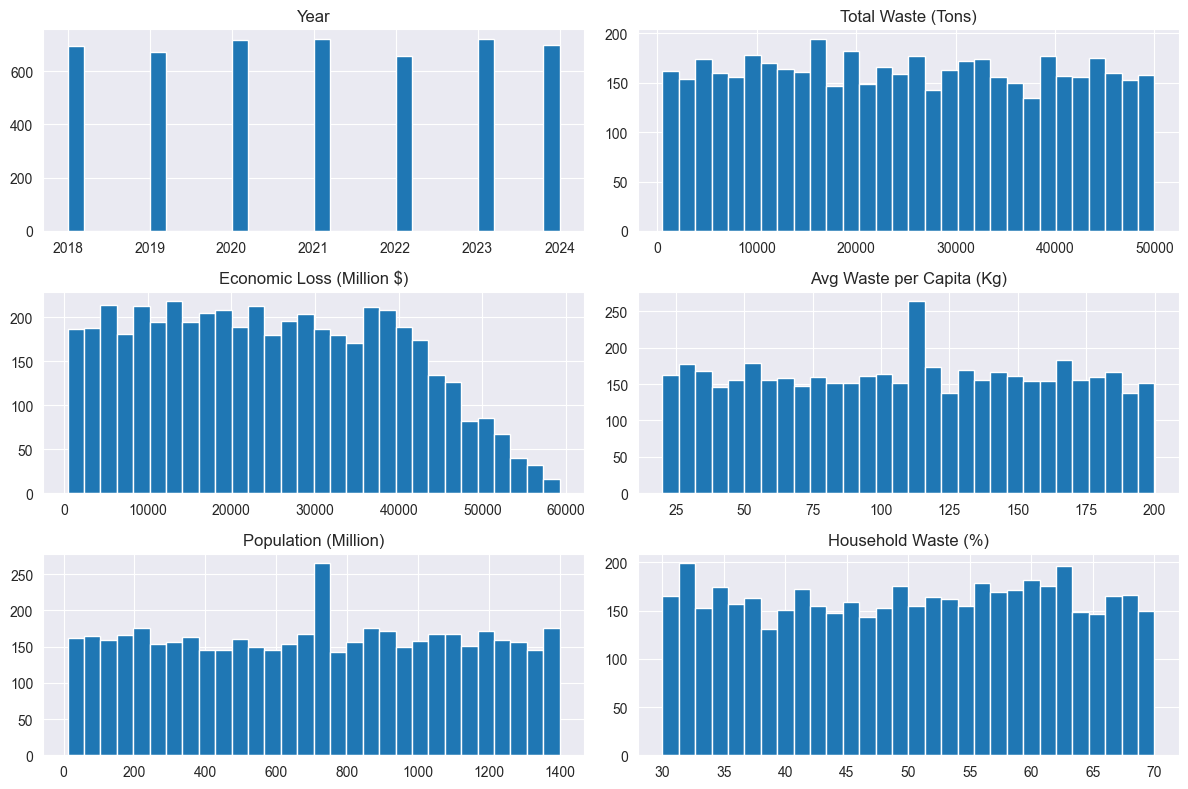

In [32]:
# 📌 Строим гистограммы для всех числовых признаков
df.select_dtypes('number').hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

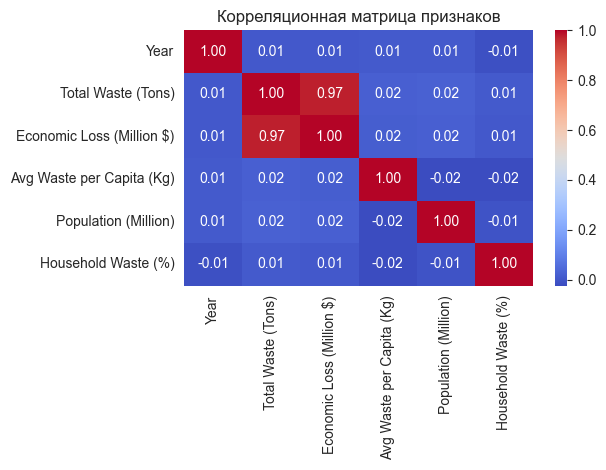

In [33]:
# 📌 Построение корреляционной матрицы между числовыми признаками
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Корреляционная матрица признаков")
plt.tight_layout()
plt.show()

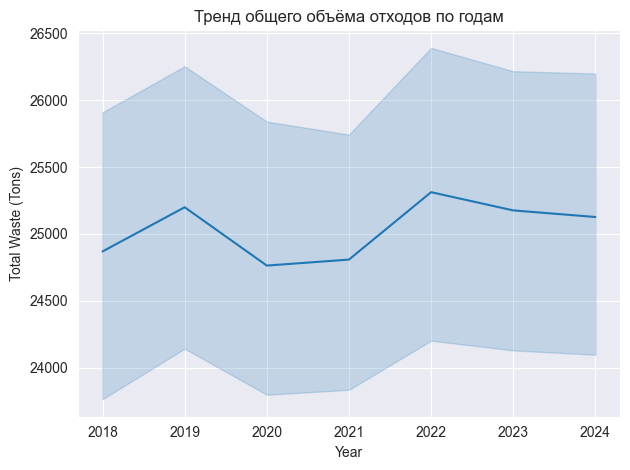

In [34]:
# 📌 Построение графика тренда общего объёма отходов по годам
sns.lineplot(data=df, x='Year', y='Total Waste (Tons)')
plt.title("Тренд общего объёма отходов по годам")
plt.tight_layout()
plt.show()

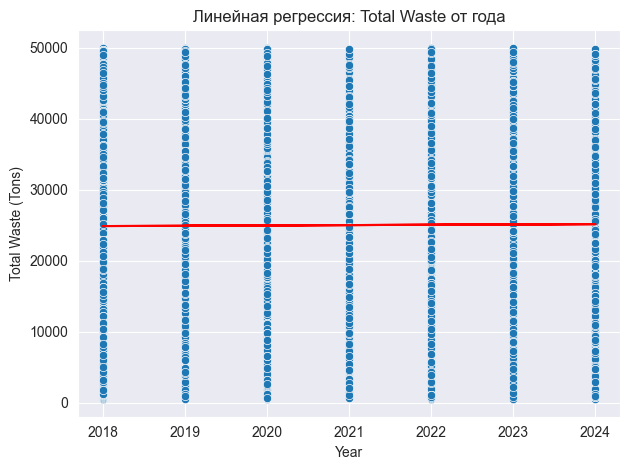

In [35]:
# 📌 Строим модель линейной регрессии: Total Waste от Year
x = df['Year']
y = df['Total Waste (Tons)']
a, b = np.polyfit(x, y, 1)  # получаем коэффициенты уравнения прямой

sns.scatterplot(x=x, y=y)           # точки по годам
plt.plot(x, a*x + b, color='red')   # линия регрессии
plt.title("Линейная регрессия: Total Waste от года")
plt.tight_layout()
plt.show()